# Graphing RSI, Moving Avg, Volume, Etc. from Yahoo and csv files

## Table of Contents
1. Yahoo Finance
 1. [How to Get Values](#Ways-to-get-values-from-Yahoo-Finance)
 2. [Candlestick Graphs](#Types-of-Candlestick-graphs-using-Yahoo-Finance-Data)
 3. [Subplotting Close and Volume](#Subplotting-Close-and-Volume)
2. [Moving Average Graphs](#Moving-Avg-Graphs)
3. [Interactive RSI Graph](#Interactive-Graph-that-let's-you-enter-Yahoo-ticker-you-are-interested-in-seeing)
4. [RSI Graph Using csv File](#Graph-that-Pulls-from-csv,-which-would-be-more-applicable-in-future-work!)
5. [RSI Graph Used to Compare](#Graph-I-compared-above-one-to,-they-will-look-the-same)

## Ways to get values from Yahoo finance

In [2]:
import urllib.request, urllib.error, urllib.parse
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.finance import candlestick_ohlc
import matplotlib
import pylab
#yr/month/day
fh = matplotlib.finance.fetch_historical_yahoo('^GSPC', (2000, 1, 1), (2001, 12, 31))
matplotlib.finance.parse_yahoo_historical_ochl(fh, adjusted=True, asobject=False)

[(730122.0, 1469.25, 1455.219971, 1478.0, 1438.3599850000001, 931800000.0),
 (730123.0,
  1455.219971,
  1399.420044,
  1455.219971,
  1397.4300539999999,
  1009000000.0),
 (730124.0,
  1399.420044,
  1402.1099850000001,
  1413.2700199999999,
  1377.6800539999999,
  1085500000.0),
 (730125.0,
  1402.1099850000001,
  1403.4499510000001,
  1411.900024,
  1392.099976,
  1092300000.0),
 (730126.0,
  1403.4499510000001,
  1441.469971,
  1441.469971,
  1400.7299800000001,
  1225200000.0),
 (730129.0,
  1441.469971,
  1457.599976,
  1464.3599850000001,
  1441.469971,
  1064800000.0),
 (730130.0,
  1457.599976,
  1438.5600589999999,
  1458.660034,
  1434.420044,
  1014000000.0),
 (730131.0,
  1438.5600589999999,
  1432.25,
  1442.599976,
  1427.079956,
  974600000.0),
 (730132.0,
  1432.25,
  1449.6800539999999,
  1454.1999510000001,
  1432.25,
  1030400000.0),
 (730133.0,
  1449.6800539999999,
  1465.150024,
  1473.0,
  1449.6800539999999,
  1085900000.0),
 (730137.0,
  1465.150024,
  1455.14

In [3]:
from datetime import datetime
import pandas.io.data as web
df = web.DataReader("aapl", 'yahoo', datetime(2008, 8, 15), datetime(2008, 10, 15))
df.head(3)

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-15,179.039999,179.750002,175.050001,175.740004,177062900,23.109433
2008-08-18,175.570000,177.809998,173.820000,175.389996,138003600,23.063408
2008-08-19,174.540003,177.069994,171.809994,173.530006,154051100,22.818823


## Types of Candlestick graphs using Yahoo Finance Data
[Top](#Table-of-Contents)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2008-08-15  179.039999  179.750002  175.050001  175.740004  177062900   
2008-08-18  175.570000  177.809998  173.820000  175.389996  138003600   

            Adj Close  
Date                   
2008-08-15  23.109433  
2008-08-18  23.063408  


(<matplotlib.collections.LineCollection at 0x9723d30>,
 <matplotlib.collections.PolyCollection at 0x9723eb8>)

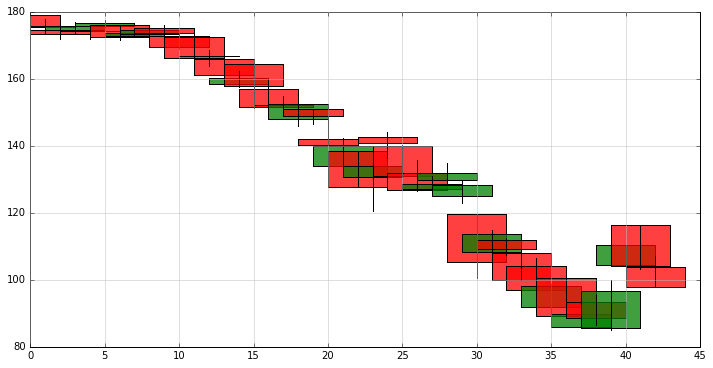

In [4]:
from datetime import datetime
import pandas.io.data as web
from matplotlib.finance import candlestick2_ohlc
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline

df = web.DataReader("aapl", 'yahoo', datetime(2008, 8, 15), datetime(2008, 10, 15))
print(df.head(2))
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
candlestick2_ohlc(ax1, df.Open, df.High, df.Low, df.Close, width=4, colorup='g', colordown='r', alpha=0.75)

(<matplotlib.collections.LineCollection at 0x9ca4358>,
 <matplotlib.collections.LineCollection at 0x9ca4e80>)

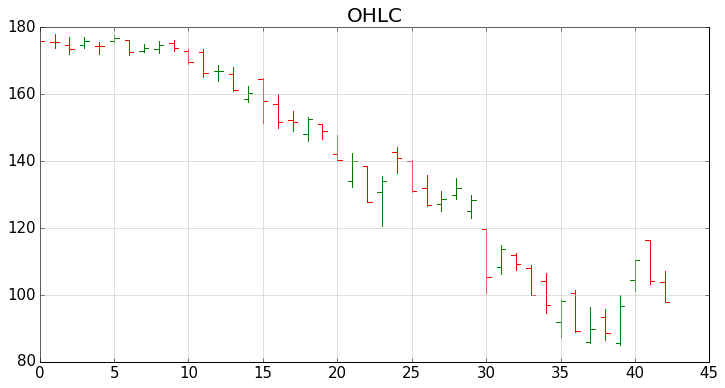

In [5]:
from matplotlib.finance import plot_day_summary2_ochl
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title('OHLC', size=(20))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plot_day_summary2_ochl(ax, df.Open, df.Close, df.High, df.Low, ticksize=4, colorup='g', colordown='r')

##  Subplotting Close and Volume
[Top](#Table-of-Contents)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2011-06-16  127.059998  127.970001  126.320000  127.300003  308032800   
2011-06-17  127.930000  127.940002  126.620003  127.050003  233284900   
2011-06-20  126.620003  127.970001  126.580002  127.699997  159479000   

             Adj Close  
Date                    
2011-06-16  114.809338  
2011-06-17  115.151939  
2011-06-20  115.741062  
Min: 37317800 Max: 717828700 Average: 138951436.328


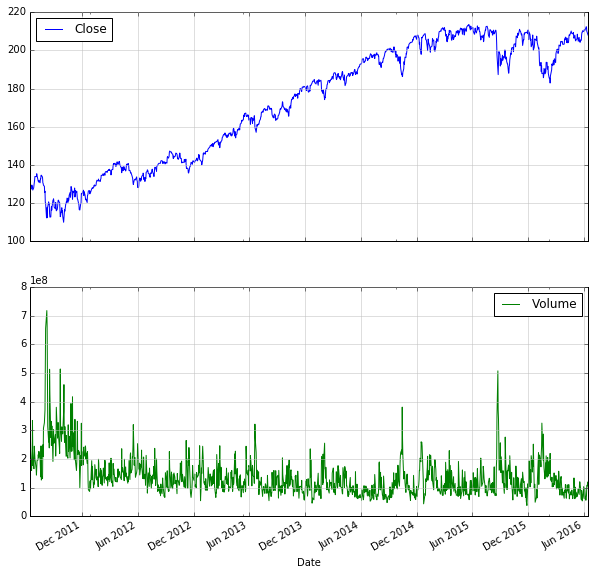

In [6]:
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
df2 = web.DataReader("SPY", 'yahoo', start, end)
     
print(df2.head(3))
vol = df2[['Volume']]
print ("Min: %s Max: %s Average: %s" % (vol.min().values[0], vol.max().values[0], vol.mean().values[0]))

# plot the historical closing prices and volume using matplotlib
plots = df2[['Close', 'Volume']].plot(subplots=True, figsize=(10, 10))
plt.show()

## Moving Avg Graphs
[Top](#Table-of-Contents)

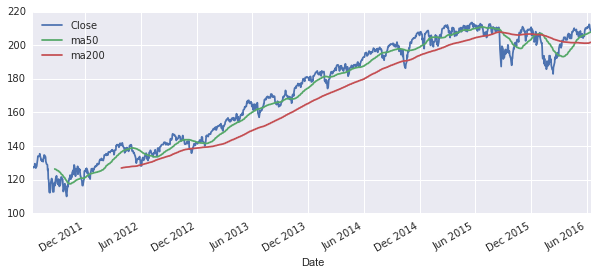

In [7]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df2['ma50'] = pd.rolling_mean(df2['Close'], 50)
df2['ma200'] = pd.rolling_mean(df2['Close'], 200)
plots = df2[['Close','ma50', 'ma200']].plot(subplots=False, figsize=(10, 4))
plt.show()

In [8]:
data = pd.read_csv("C:/Users/msteinme/Documents/rsi.csv")
data = data[['date','Open','High','Low','Close','Volume']]
data['date'] = pd.to_datetime(data['date'])
data.index = data['date']
data.drop(['date'],axis=1)
data.head(2)

,date,Open,High,Low,Close,Volume
date,,,,,,
1998-07-06,1998-07-06,132,132,132,132,1000
1998-07-13,1998-07-13,130,130,132,130,1000


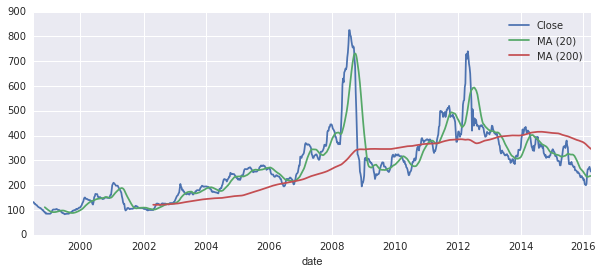

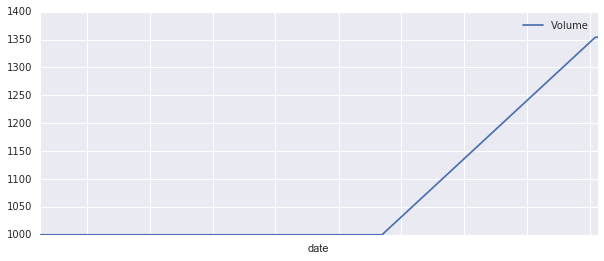

In [9]:
#close, and moving avg of the urea stuff
#adding moving average column to original data
data['MA (20)'] = pd.rolling_mean(data['Close'], 20)
data['MA (200)'] = pd.rolling_mean(data['Close'], 200)
plots1 = data[['Close','MA (20)', 'MA (200)']].plot(subplots=False, figsize=(10, 4))
plots2 = data[['Volume']].plot(sharex=plots1,figsize=(10,4))
plt.setp(plots2.get_xticklabels(), visible=False)
plt.show()

## Interactive Graph that let's you enter Yahoo ticker you are interested in seeing
[Top](#Table-of-Contents)

In [ ]:
#https://pythonprogramming.net/advanced-matplotlib-graphing-charting-tutorial/
# looks at values over past 10 years
#relative strength = ( (% change in price in stock/% change in benchmark) - 1) * 100
import urllib.request, urllib.error, urllib.parse
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.finance import candlestick_ohlc
import matplotlib
import pylab
matplotlib.rcParams.update({'font.size': 9})

def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

def movingaverage(values,window):
    weigths = np.repeat(1.0, window)/window
    smas = np.convolve(values, weigths, 'valid')
    return smas # as a numpy array


def ExpMovingAverage(values, window):
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a


def computeMACD(x, slow=26, fast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = ExpMovingAverage(x, slow)
    emafast = ExpMovingAverage(x, fast)
    return emaslow, emafast, emafast - emaslow


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graphData(stock,MA1,MA2):

    '''
        Use this to dynamically pull a stock:
    '''
    try:
        print('Currently Pulling',stock)
        urlToVisit = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
        stockFile =[]
        try:
            sourceCode = urllib.request.urlopen(urlToVisit).read().decode()
            splitSource = sourceCode.split('\n')
            for eachLine in splitSource:
                splitLine = eachLine.split(',')
                if len(splitLine)==6:
                    if 'values' not in eachLine:
                        stockFile.append(eachLine)
        except Exception as e:
            print(str(e), 'failed to organize pulled data.')
    except Exception as e:
        print(str(e), 'failed to pull pricing data')

    try:
        date, closep, highp, lowp, openp, volume = np.loadtxt(stockFile,delimiter=',', unpack=True,
                                                              converters={ 0: bytespdate2num('%Y%m%d')})
        x = 0
        y = len(date)
        newAr = []
        while x < y:
            appendLine = date[x],openp[x],highp[x],lowp[x],closep[x],volume[x]
            newAr.append(appendLine)
            x+=1
            
        Av1 = movingaverage(closep, MA1)
        Av2 = movingaverage(closep, MA2)

        SP = len(date[MA2-1:])
            
        fig = plt.figure(facecolor='#07000d')

        ax1 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4, axisbg='#07000d')
        candlestick_ohlc(ax1, newAr[-SP:], width=.6, colorup='#53c156', colordown='#ff1717')

        Label1 = str(MA1)+' SMA'
        Label2 = str(MA2)+' SMA'

        ax1.plot(date[-SP:],Av1[-SP:],'#e1edf9',label=Label1, linewidth=1.5)
        ax1.plot(date[-SP:],Av2[-SP:],'#4ee6fd',label=Label2, linewidth=1.5)
        
        ax1.grid(True, color='w')
        ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.yaxis.label.set_color("w")
        ax1.spines['bottom'].set_color("#5998ff")
        ax1.spines['top'].set_color("#5998ff")
        ax1.spines['left'].set_color("#5998ff")
        ax1.spines['right'].set_color("#5998ff")
        ax1.tick_params(axis='y', colors='w')
        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
        ax1.tick_params(axis='x', colors='w')
        plt.ylabel('Stock price and Volume')

        maLeg = plt.legend(loc=9, ncol=2, prop={'size':7},
                   fancybox=True, borderaxespad=0.)
        maLeg.get_frame().set_alpha(0.4)
        textEd = pylab.gca().get_legend().get_texts()
        pylab.setp(textEd[0:5], color = 'w')

        volumeMin = 0
        
        ax0 = plt.subplot2grid((6,4), (0,0), sharex=ax1, rowspan=1, colspan=4, axisbg='#07000d')
        rsi = rsiFunc(closep)
        rsiCol = '#c1f9f7'
        posCol = '#386d13'
        negCol = '#8f2020'
        
        ax0.plot(date[-SP:], rsi[-SP:], rsiCol, linewidth=1.5)
        ax0.axhline(80, color=negCol)
        ax0.axhline(20, color=posCol)
        ax0.fill_between(date[-SP:], rsi[-SP:], 80, where=(rsi[-SP:]>=80), facecolor=negCol, edgecolor=negCol, alpha=0.5)
        ax0.fill_between(date[-SP:], rsi[-SP:], 20, where=(rsi[-SP:]<=20), facecolor=posCol, edgecolor=posCol, alpha=0.5)
        ax0.set_yticks([20,80])
        ax0.yaxis.label.set_color("w")
        ax0.spines['bottom'].set_color("#5998ff")
        ax0.spines['top'].set_color("#5998ff")
        ax0.spines['left'].set_color("#5998ff")
        ax0.spines['right'].set_color("#5998ff")
        ax0.tick_params(axis='y', colors='w')
        ax0.tick_params(axis='x', colors='w')
        plt.ylabel('RSI')

        ax1v = ax1.twinx()
        ax1v.fill_between(date[-SP:],volumeMin, volume[-SP:], facecolor='#00ffe8', alpha=.4)
        ax1v.axes.yaxis.set_ticklabels([])
        ax1v.grid(False)
        ###Edit this to 3, so it's a bit larger
        ax1v.set_ylim(0, 3*volume.max())
        ax1v.spines['bottom'].set_color("#5998ff")
        ax1v.spines['top'].set_color("#5998ff")
        ax1v.spines['left'].set_color("#5998ff")
        ax1v.spines['right'].set_color("#5998ff")
        ax1v.tick_params(axis='x', colors='w')
        ax1v.tick_params(axis='y', colors='w')
        ax2 = plt.subplot2grid((6,4), (5,0), sharex=ax1, rowspan=1, colspan=4, axisbg='#07000d')
        fillcolor = '#00ffe8'
        nslow = 26
        nfast = 12
        nema = 9
        emaslow, emafast, macd = computeMACD(closep)
        ema9 = ExpMovingAverage(macd, nema)
        ax2.plot(date[-SP:], macd[-SP:], color='#4ee6fd', lw=2)
        ax2.plot(date[-SP:], ema9[-SP:], color='#e1edf9', lw=1)
        ax2.fill_between(date[-SP:], macd[-SP:]-ema9[-SP:], 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)

        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
        ax2.spines['bottom'].set_color("#5998ff")
        ax2.spines['top'].set_color("#5998ff")
        ax2.spines['left'].set_color("#5998ff")
        ax2.spines['right'].set_color("#5998ff")
        ax2.tick_params(axis='x', colors='w')
        ax2.tick_params(axis='y', colors='w')
        plt.ylabel('MACD', color='w')
        ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
        for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

        plt.suptitle(stock.upper(),color='w')
        plt.setp(ax0.get_xticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        
        plt.subplots_adjust(left=.09, bottom=.14, right=.94, top=.95, wspace=.20, hspace=0)
        plt.show()
        fig.savefig('example.png',facecolor=fig.get_facecolor())
           
    except Exception as e:
        print('main loop',str(e))

while True:
    stock = input('Stock to plot: ')
    graphData(stock,10,50)

Stock to plot: spy
Currently Pulling spy


## Graph that Pulls from csv, which would be more applicable in future work!
[Top](#Table-of-Contents)

NameError: name 'today' is not defined

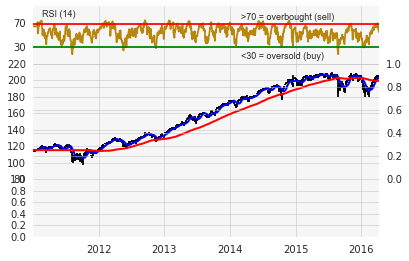

In [10]:
import datetime
import numpy as np
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import csv

#csv file needs column headers: date, open, high, low, close, volume, adj_close
#in reverse date order so most recent date on top
r = mlab.csv2rec('C:/Users/msteinme/Documents/rsinew.csv')
r.sort()

def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.
    type is 'simple' | 'exponential'
    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a


def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """

    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed >= 0].sum()/n
    down = -seed[seed < 0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n - 1) + upval)/n
        down = (down*(n - 1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1. + rs)

    return rsi


def moving_average_convergence(x, nslow=26, nfast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = moving_average(x, nslow, type='exponential')
    emafast = moving_average(x, nfast, type='exponential')
    return emaslow, emafast, emafast - emaslow


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 9
left, width = 0.1, 0.8
rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.4]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color

ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax1)


# plot the relative strength index
prices = r.adj_close
rsi = relative_strength(prices)
fillcolor = 'darkgoldenrod'

ax1.plot(r.date, rsi, color=fillcolor)
ax1.axhline(70, color='red')
ax1.axhline(30, color='green')
ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
ax1.text(0.6, 0.9, '>70 = overbought (sell)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax1.text(0.6, 0.1, '<30 = oversold (buy)', transform=ax1.transAxes, fontsize=textsize)
ax1.set_ylim(0, 100)
ax1.set_yticks([30, 70])
ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_title('ticker interested in')

# plot the price and volume data
dx = r.adj_close - r.close
low = r.low + dx
high = r.high + dx

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
ax2.vlines(r.date[up], low[up], high[up], color='black', label='_nolegend_')
ax2.vlines(r.date[~up], low[~up], high[~up], color='black', label='_nolegend_')
ma20 = moving_average(prices, 20, type='simple')
ma200 = moving_average(prices, 200, type='simple')

linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = r[-1]
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last.open, last.high,
    last.low, last.close,
    last.volume*1e-6,
    last.close - last.open)
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
leg.get_frame().set_alpha(0.5)


volume = (r.close*r.volume)/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(r.date, volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# compute the MACD indicator
fillcolor = 'darkslategrey'
nslow = 26
nfast = 12
nema = 9
emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
ema9 = moving_average(macd, nema, type='exponential')
ax3.plot(r.date, macd, color='black', lw=2)
ax3.plot(r.date, ema9, color='blue', lw=1)
ax3.fill_between(r.date, macd - ema9, 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)


ax3.text(0.025, 0.95, 'MACD (%d, %d, %d)' % (nfast, nslow, nema), va='top',
         transform=ax3.transAxes, fontsize=textsize)

#ax3.set_yticks([])
# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax1, ax2, ax2t, ax3:
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

## Graph I compared above one to, they will look the same
[Top](#Table-of-Contents)

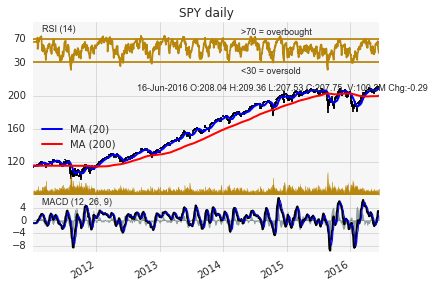

In [11]:
import datetime
import numpy as np
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


startdate = datetime.date(2011, 1, 1)
today = enddate = datetime.date.today()
ticker = 'SPY'


fh = finance.fetch_historical_yahoo(ticker, startdate, enddate)
# a numpy record array with fields: date, open, high, low, close, volume, adj_close)

r = mlab.csv2rec(fh)
fh.close()
r.sort()


def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a


def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """

    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed >= 0].sum()/n
    down = -seed[seed < 0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n - 1) + upval)/n
        down = (down*(n - 1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1. + rs)

    return rsi


def moving_average_convergence(x, nslow=26, nfast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = moving_average(x, nslow, type='exponential')
    emafast = moving_average(x, nfast, type='exponential')
    return emaslow, emafast, emafast - emaslow


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 9
left, width = 0.1, 0.8
rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.4]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color

ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax1)


# plot the relative strength indicator
prices = r.adj_close
rsi = relative_strength(prices)
fillcolor = 'darkgoldenrod'

ax1.plot(r.date, rsi, color=fillcolor)
ax1.axhline(70, color=fillcolor)
ax1.axhline(30, color=fillcolor)
ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
ax1.set_ylim(0, 100)
ax1.set_yticks([30, 70])
ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax1.set_title('%s daily' % ticker)

# plot the price and volume data
dx = r.adj_close - r.close
low = r.low + dx
high = r.high + dx

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
ax2.vlines(r.date[up], low[up], high[up], color='black', label='_nolegend_')
ax2.vlines(r.date[~up], low[~up], high[~up], color='black', label='_nolegend_')
ma20 = moving_average(prices, 20, type='simple')
ma200 = moving_average(prices, 200, type='simple')

linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = r[-1]
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last.open, last.high,
    last.low, last.close,
    last.volume*1e-6,
    last.close - last.open)
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
leg.get_frame().set_alpha(0.5)


volume = (r.close*r.volume)/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(r.date, volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# compute the MACD indicator
fillcolor = 'darkslategrey'
nslow = 26
nfast = 12
nema = 9
emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
ema9 = moving_average(macd, nema, type='exponential')
ax3.plot(r.date, macd, color='black', lw=2)
ax3.plot(r.date, ema9, color='blue', lw=1)
ax3.fill_between(r.date, macd - ema9, 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)


ax3.text(0.025, 0.95, 'MACD (%d, %d, %d)' % (nfast, nslow, nema), va='top',
         transform=ax3.transAxes, fontsize=textsize)

#ax3.set_yticks([])
# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax1, ax2, ax2t, ax3:
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()
